In [1]:
### from __future__ import division, absolute_import

import os
import sys
import random

import numpy as np
from tabulate import tabulate

#root
absPath = '/home/angela/padding_EBI/'
sys.path.insert(0, absPath)

#from src.Target import Target

np.random.seed(8)
random.seed(8)

from src.preprocessing import *
from src.model_architecture import *
from src.training_model import *
from src.postprocessing import *
from src.comparing_results import *

#para no imprimir warnings chungos
import warnings 
warnings.simplefilter("ignore")

#from src.callbacks import *
%matplotlib inline

Using TensorFlow backend.


### Defining parameters

In [2]:
list_paddings = [
    'post_padding', 'pre_padding', 'mid_padding', 
    'strf_padding', 'ext_padding', 
                 'rnd_padding', 
                 'aug_padding',
                'zoom_padding'
                ]
#list_paddings = ['aug_padding']
#list_padding_short = ['post_padding', 'pre_padding', 'mid_padding', 'stretch_padding', 'ext_padding', 
#                 'rdm_padding']
#hierarchy of folders: annotation/dataset/architecture/n_neurs/task/padding
folder1 = 'EC_number/archaea/1conv/64filts_size5/' 
folder2 = 'EC_number/archaea/3denses/bio_neurons/'
folder3 = 'EC_number/archaea/rnn_conv/256rnn/'
folder4 = 'EC_number/archaea/stack_conv/10filts_sizeJurtz/'
column = "EC number"

n_folds = 10

dicti = creating_dict()

max_lenn = 1000

In [3]:
folders = [folder1, folder2, folder3, folder4]
names_folders = ["1_conv", "only_denses", "bi_lstm", "stack_conv"]

## Comparing accuracy

### Task 1

In [4]:
task = "task1/"
task_string = "Task 1"

In [5]:
#folder = 'EC_number/archaea/1conv/64filts_size5/' 
scores_arch_task1, accu_arch_task1 = processing_metrics_dodge(list_paddings, folders, names_folders, task, n_folds)
scores_final_task1 = pd.concat([scores_arch_task1[0], scores_arch_task1[1], scores_arch_task1[2], scores_arch_task1[3]])
accu_final_task1 = pd.concat([accu_arch_task1[0], accu_arch_task1[1], accu_arch_task1[2], accu_arch_task1[3]])

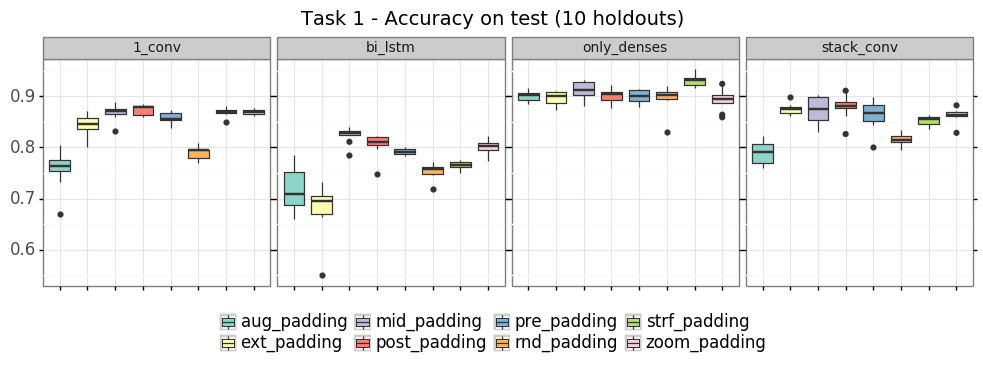

<ggplot: (8776216158710)>

In [6]:
plotting_acc_dodge_boxplots(accu_final_task1, n_folds, task_string, task)

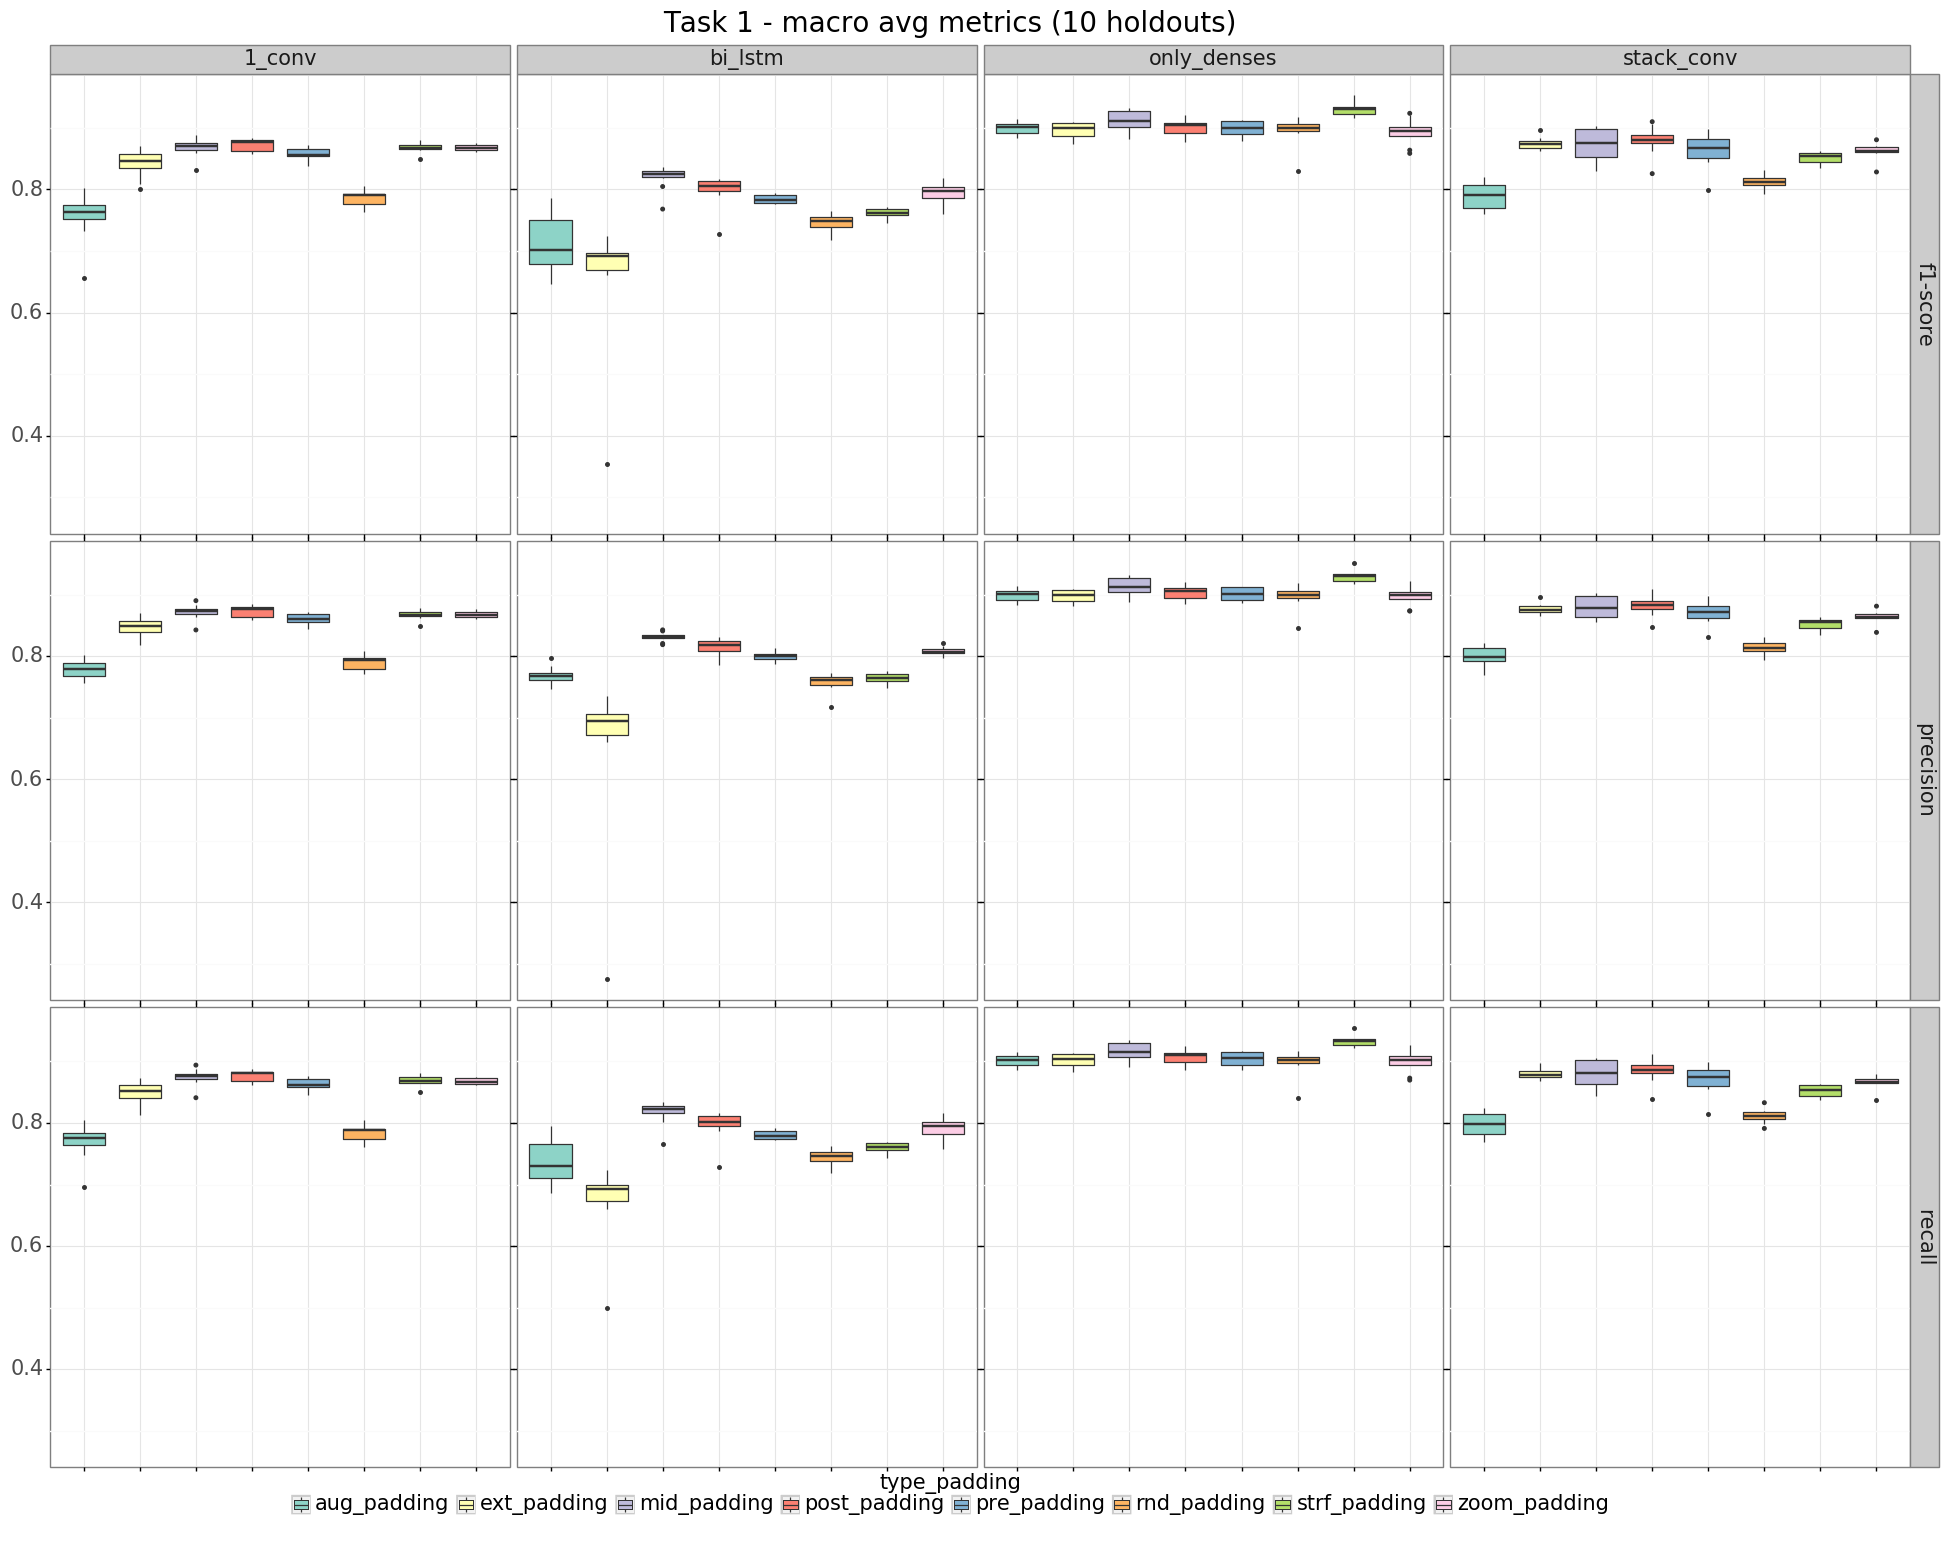

<ggplot: (8776215208140)>

In [7]:
plotting_scores_arch(scores_final_task1, n_folds, task_string, task, "macro avg")

In [8]:
def processing_auc_dodge(list_paddings, folders, names_folders,task, nfolds):
    """It process the saved metrics for AUC from the task 1 models and returns a dataframe with processed AUC on test"""
    auc_list = []
    for idx, folder in enumerate(folders):
        metrics, k = collecting_metrics_folds("auc", list_paddings, folder, task, nfolds)
        df_auc = processing_roc_auc(metrics, "auc", list_paddings)
        
        auc = df_auc.reset_index().drop("index",1)#.melt(id_vars="index")
        auc["architecture"] = names_folders[idx]
        auc_list.append(auc)

    return auc_list

In [9]:
auc_arch_task1 = processing_auc_dodge(list_paddings, folders, names_folders, "task1/", n_folds)
#len(auc_arch_task1)
auc_final_task1 = pd.concat([auc_arch_task1[0], auc_arch_task1[1], auc_arch_task1[2], auc_arch_task1[3]])
auc_final_task1.drop("level_0", 1, inplace=True)

### Task 2

In [10]:
task = "task2/"
task_string = "Task 2"

In [11]:
scores_arch_task2, accu_arch_task2 = processing_metrics_dodge(list_paddings, folders, names_folders, task, n_folds)
scores_final_task2 = pd.concat([scores_arch_task2[0], scores_arch_task2[1], scores_arch_task2[2], scores_arch_task2[3]])
accu_final_task2 = pd.concat([accu_arch_task2[0], accu_arch_task2[1], accu_arch_task2[2], accu_arch_task2[3]])

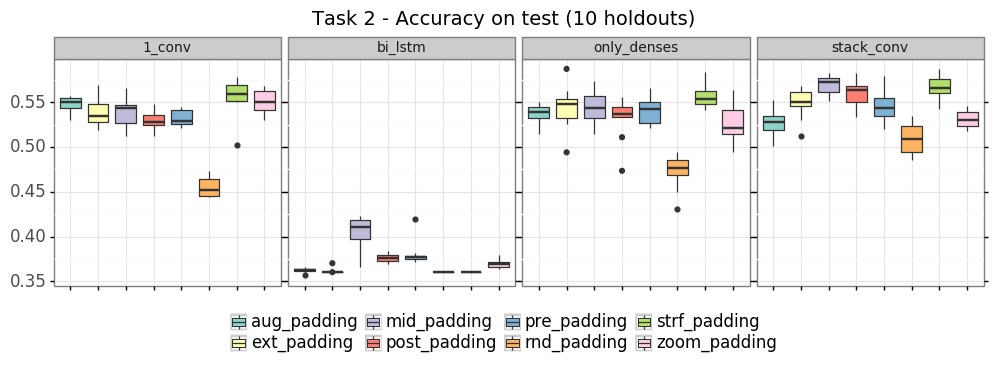

<ggplot: (-9223363260639380557)>

In [12]:
plotting_acc_dodge_boxplots(accu_final_task2, n_folds, task_string, task)

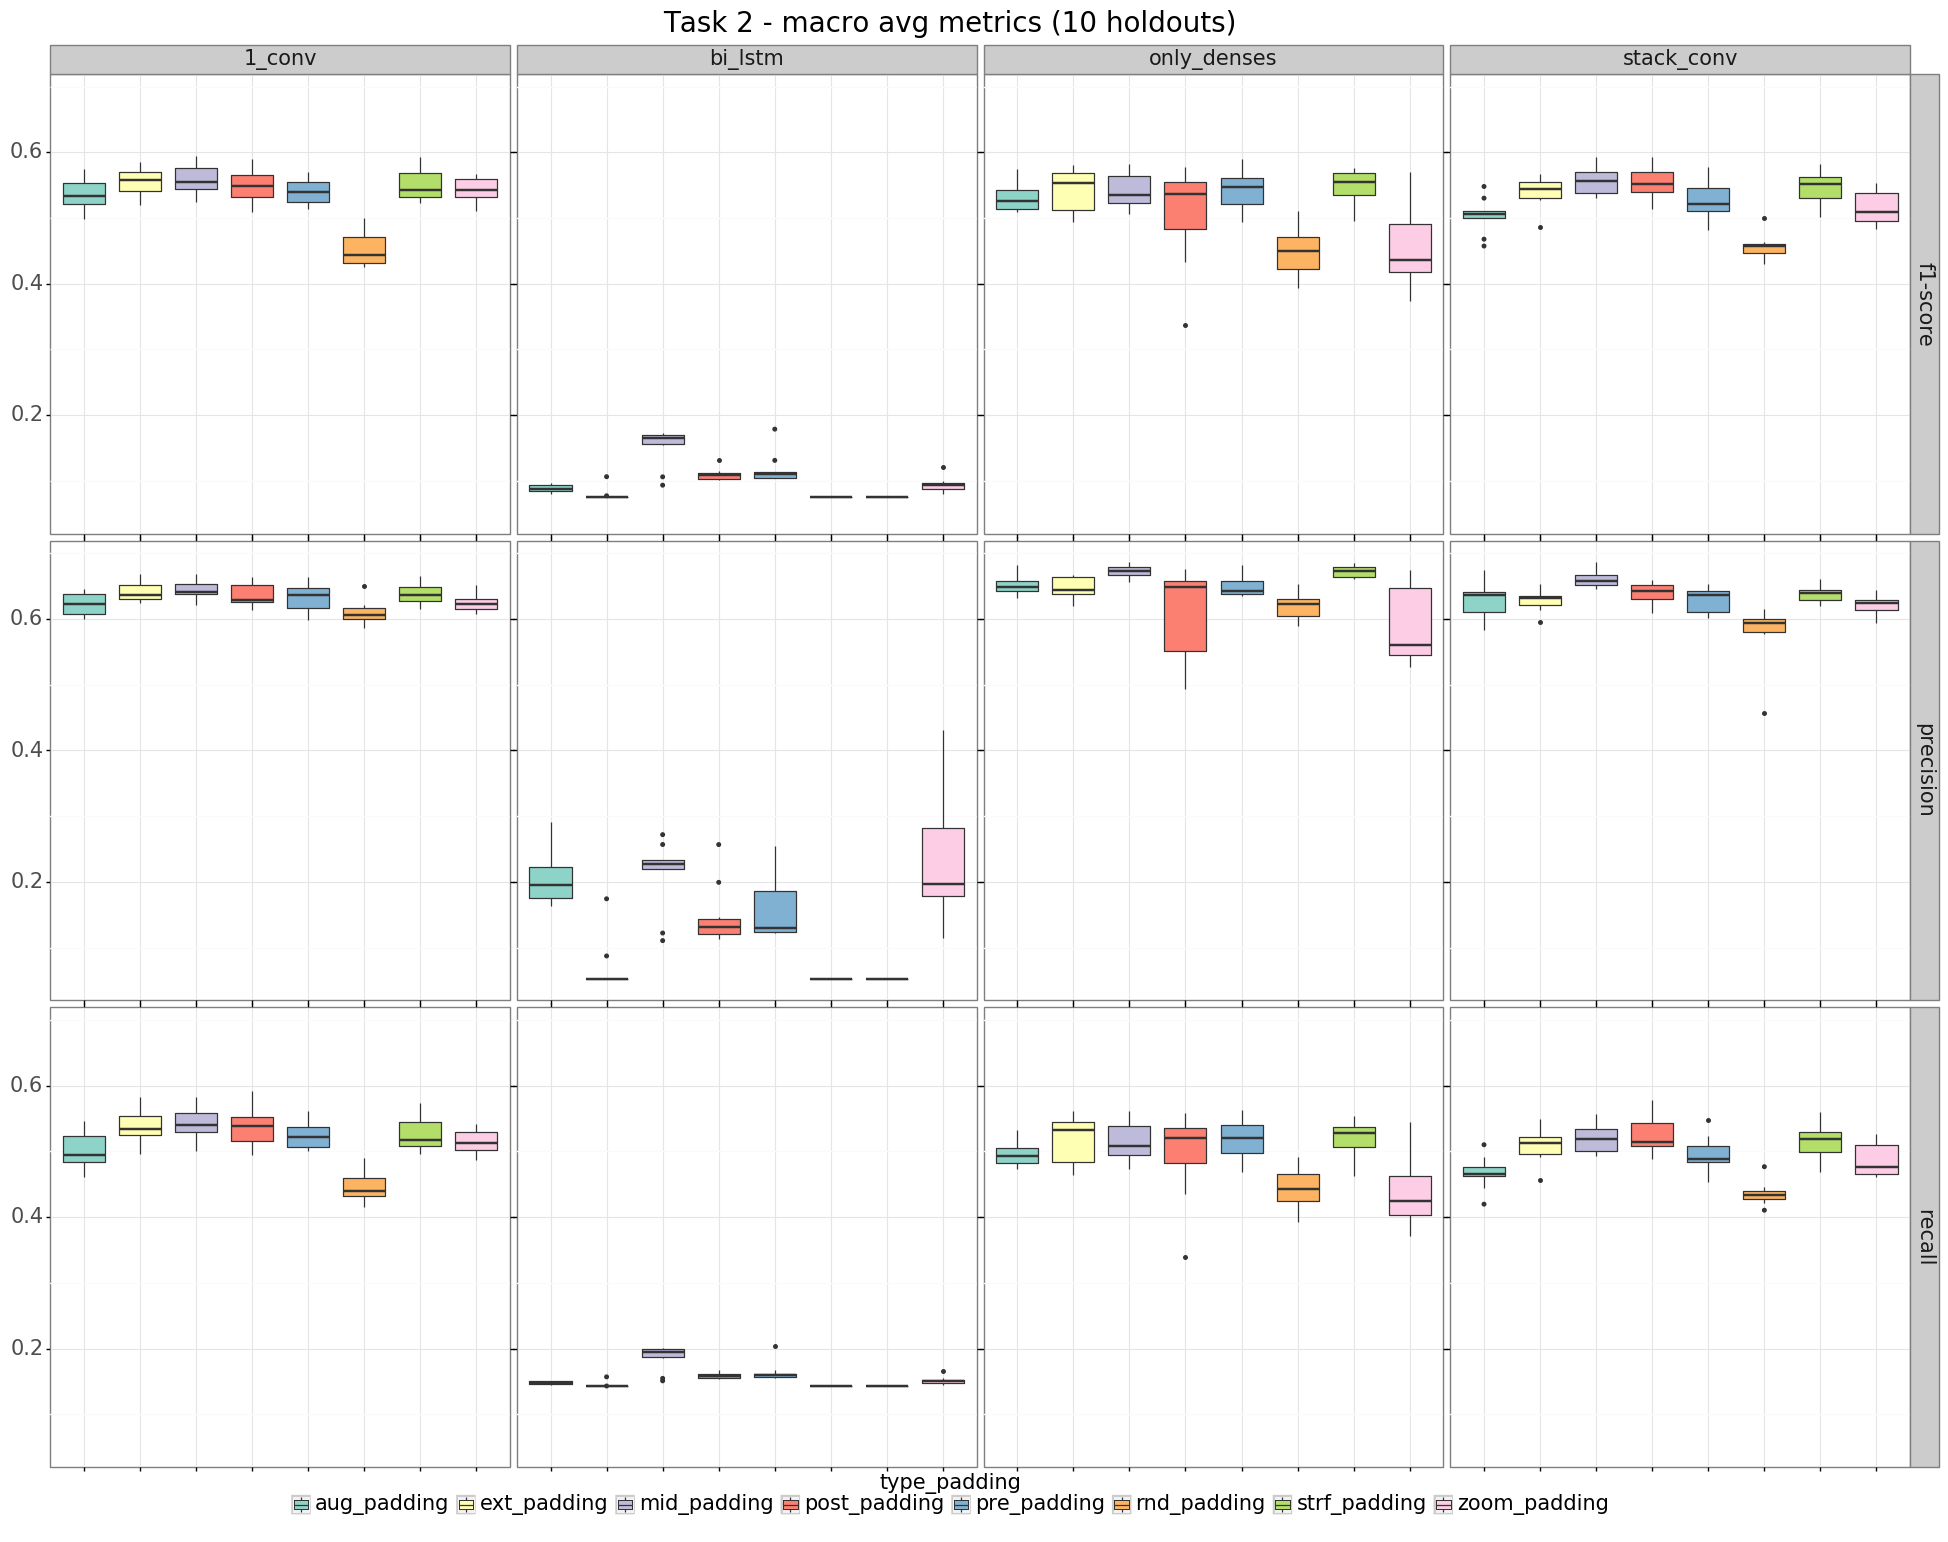

<ggplot: (8776213994388)>

In [13]:
plotting_scores_arch(scores_final_task2, n_folds, task_string, task, "macro avg")

# Formatting table

In [59]:
#de todo esto debería ser una funcion 

def formatting_table(df_task1, df_task2, metrics, var_padding, var_val):
    df_task1['task'] = "task1"
    df_task2['task'] = "task2"
    #joining both dataframes
    df_final = pd.concat([df_task1, df_task2])
    df_group = df_final.groupby(["task", "architecture", var_padding], 
                                as_index=False).agg({var_val:['mean','std']})
    df_group.columns = ['_'.join(col) for col in df_group.columns]
    df_group[metrics] = df_group[['value_mean','value_std']].apply(lambda x : 
                                                                          '{:0.2f} $\pm$ {:0.2f}'.format(x[0],x[1]), axis=1)
    var_padding_ = var_padding + "_"
    df_def =df_group.loc[:,['task_', 'architecture_', var_padding_, 
                                 metrics]].set_index(['task_', 'architecture_', var_padding_]).unstack(level=-1)
    df_def_t = df_def.stack().unstack(level=1)
    print(tabulate(df_def_t, headers="keys", tablefmt='latex_raw'))
    return df_def_t
    

## Accuracy

In [60]:
accu_final = formatting_table(accu_final_task1, accu_final_task2, "accuracy", "variable", "value")

\begin{tabular}{lllll}
\hline
                           & ('accuracy', '1_conv')   & ('accuracy', 'bi_lstm')   & ('accuracy', 'only_denses')   & ('accuracy', 'stack_conv')   \\
\hline
 ('task1', 'aug_padding')  & 0.76 $\pm$ 0.04          & 0.72 $\pm$ 0.04           & 0.90 $\pm$ 0.01               & 0.79 $\pm$ 0.02              \\
 ('task1', 'ext_padding')  & 0.84 $\pm$ 0.02          & 0.68 $\pm$ 0.05           & 0.90 $\pm$ 0.01               & 0.88 $\pm$ 0.01              \\
 ('task1', 'mid_padding')  & 0.87 $\pm$ 0.02          & 0.82 $\pm$ 0.02           & 0.91 $\pm$ 0.02               & 0.87 $\pm$ 0.03              \\
 ('task1', 'post_padding') & 0.87 $\pm$ 0.01          & 0.81 $\pm$ 0.02           & 0.90 $\pm$ 0.01               & 0.88 $\pm$ 0.02              \\
 ('task1', 'pre_padding')  & 0.86 $\pm$ 0.01          & 0.79 $\pm$ 0.01           & 0.90 $\pm$ 0.01               & 0.86 $\pm$ 0.03              \\
 ('task1', 'rnd_padding')  & 0.79 $\pm$ 0.01          & 0.75 $\pm$ 0.01    

In [61]:
accu_final

accuracy                                    \
architecture_                1_conv          bi_lstm      only_denses   
task_ variable_                                                         
task1 aug_padding   0.76 $\pm$ 0.04  0.72 $\pm$ 0.04  0.90 $\pm$ 0.01   
      ext_padding   0.84 $\pm$ 0.02  0.68 $\pm$ 0.05  0.90 $\pm$ 0.01   
      mid_padding   0.87 $\pm$ 0.02  0.82 $\pm$ 0.02  0.91 $\pm$ 0.02   
      post_padding  0.87 $\pm$ 0.01  0.81 $\pm$ 0.02  0.90 $\pm$ 0.01   
      pre_padding   0.86 $\pm$ 0.01  0.79 $\pm$ 0.01  0.90 $\pm$ 0.01   
      rnd_padding   0.79 $\pm$ 0.01  0.75 $\pm$ 0.01  0.90 $\pm$ 0.03   
      strf_padding  0.87 $\pm$ 0.01  0.76 $\pm$ 0.01  0.93 $\pm$ 0.01   
      zoom_padding  0.87 $\pm$ 0.00  0.80 $\pm$ 0.01  0.89 $\pm$ 0.02   
task2 aug_padding   0.55 $\pm$ 0.01  0.36 $\pm$ 0.00  0.54 $\pm$ 0.01   
      ext_padding   0.54 $\pm$ 0.02  0.36 $\pm$ 0.00  0.54 $\pm$ 0.02   
      mid_padding   0.54 $\pm$ 0.02  0.40 $\pm$ 0.02  0.54 $\pm$ 0.02   
      post_padding  0.53 $\pm$ 0.01  0.38 $\pm$ 0.00  0.53 $\pm$ 0.02   
      pre_padding   0.53 $\pm$ 0.01  0.38 $\pm$ 0.01  0.54 $\pm$ 0.02   
      rnd_padding   0.46 $\pm$ 0.01  0.36 $\pm$ 0.00  0.47 $\pm$ 0.02   
      strf_padding  0.56 $\pm$ 0.02  0.36 $\pm$ 0.00  0.56 $\pm$ 0.01   
      zoom_padding  0.55 $\pm$ 0.01  0.37 $\pm$ 0.01  0.53 $\pm$ 0.02   

                                     
architecture_            stack_conv  
task_ variable_                      
task1 aug_padding   0.79 $\pm$ 0.02  
      ext_padding   0.88 $\pm$ 0.01  
      mid_padding   0.87 $\pm$ 0.03  
      post_padding  0.88 $\pm$ 0.02  
      pre_padding   0.86 $\pm$ 0.03  
      rnd_padding   0.81 $\pm$ 0.01  
      strf_padding  0.85 $\pm$ 0.01  
      zoom_padding  0.86 $\pm$ 0.01  
task2 aug_padding   0.53 $\pm$ 0.01  
      ext_padding   0.55 $\pm$ 0.02  
      mid_padding   0.57 $\pm$ 0.01  
      post_padding  0.56 $\pm$ 0.02  
      pre_padding   0.54 $\pm$ 0.02  
      rnd_padding   0.51 $\pm$ 0.02  
      strf_padding  0.57 $\pm$ 0.01  
      zoom_padding  0.53 $\pm$ 0.01

## F1-score

In [62]:
#task 1
scores_final_task1_f1 = scores_final_task1[scores_final_task1.variable == "f1-score"]
scores_final_task1_f1_macro = scores_final_task1_f1[scores_final_task1_f1.enz_type == "macro avg"]
scores_final_task1_f1_macro["task"] = "task1"
#scores_final_task1_f1_macro.head()

#task 2
scores_final_task2_f1 = scores_final_task2[scores_final_task2.variable == "f1-score"]
scores_final_task2_f1_macro = scores_final_task2_f1[scores_final_task2_f1.enz_type == "macro avg"]
scores_final_task2_f1_macro["task"] = "task2"

f1_final = formatting_table(scores_final_task1_f1_macro, scores_final_task2_f1_macro, "f1_score", "type_padding", "value")

\begin{tabular}{lllll}
\hline
                           & ('f1_score', '1_conv')   & ('f1_score', 'bi_lstm')   & ('f1_score', 'only_denses')   & ('f1_score', 'stack_conv')   \\
\hline
 ('task1', 'aug_padding')  & 0.76 $\pm$ 0.04          & 0.71 $\pm$ 0.05           & 0.90 $\pm$ 0.01               & 0.79 $\pm$ 0.02              \\
 ('task1', 'ext_padding')  & 0.84 $\pm$ 0.02          & 0.66 $\pm$ 0.11           & 0.90 $\pm$ 0.01               & 0.88 $\pm$ 0.01              \\
 ('task1', 'mid_padding')  & 0.87 $\pm$ 0.02          & 0.82 $\pm$ 0.02           & 0.91 $\pm$ 0.02               & 0.87 $\pm$ 0.03              \\
 ('task1', 'post_padding') & 0.87 $\pm$ 0.01          & 0.80 $\pm$ 0.03           & 0.90 $\pm$ 0.01               & 0.88 $\pm$ 0.02              \\
 ('task1', 'pre_padding')  & 0.86 $\pm$ 0.01          & 0.78 $\pm$ 0.01           & 0.90 $\pm$ 0.01               & 0.86 $\pm$ 0.03              \\
 ('task1', 'rnd_padding')  & 0.79 $\pm$ 0.01          & 0.75 $\pm$ 0.01    

In [63]:
f1_final

f1_score                                    \
architecture_                 1_conv          bi_lstm      only_denses   
task_ type_padding_                                                      
task1 aug_padding    0.76 $\pm$ 0.04  0.71 $\pm$ 0.05  0.90 $\pm$ 0.01   
      ext_padding    0.84 $\pm$ 0.02  0.66 $\pm$ 0.11  0.90 $\pm$ 0.01   
      mid_padding    0.87 $\pm$ 0.02  0.82 $\pm$ 0.02  0.91 $\pm$ 0.02   
      post_padding   0.87 $\pm$ 0.01  0.80 $\pm$ 0.03  0.90 $\pm$ 0.01   
      pre_padding    0.86 $\pm$ 0.01  0.78 $\pm$ 0.01  0.90 $\pm$ 0.01   
      rnd_padding    0.79 $\pm$ 0.01  0.75 $\pm$ 0.01  0.90 $\pm$ 0.02   
      strf_padding   0.87 $\pm$ 0.01  0.76 $\pm$ 0.01  0.93 $\pm$ 0.01   
      zoom_padding   0.87 $\pm$ 0.00  0.79 $\pm$ 0.02  0.89 $\pm$ 0.02   
task2 aug_padding    0.54 $\pm$ 0.02  0.09 $\pm$ 0.01  0.53 $\pm$ 0.02   
      ext_padding    0.55 $\pm$ 0.02  0.08 $\pm$ 0.01  0.54 $\pm$ 0.03   
      mid_padding    0.56 $\pm$ 0.02  0.15 $\pm$ 0.03  0.54 $\pm$ 0.03   
      post_padding   0.55 $\pm$ 0.02  0.11 $\pm$ 0.01  0.51 $\pm$ 0.07   
      pre_padding    0.54 $\pm$ 0.02  0.12 $\pm$ 0.02  0.54 $\pm$ 0.03   
      rnd_padding    0.45 $\pm$ 0.03  0.08 $\pm$ 0.00  0.45 $\pm$ 0.03   
      strf_padding   0.55 $\pm$ 0.02  0.08 $\pm$ 0.00  0.55 $\pm$ 0.03   
      zoom_padding   0.54 $\pm$ 0.02  0.09 $\pm$ 0.01  0.46 $\pm$ 0.06   

                                      
architecture_             stack_conv  
task_ type_padding_                   
task1 aug_padding    0.79 $\pm$ 0.02  
      ext_padding    0.88 $\pm$ 0.01  
      mid_padding    0.87 $\pm$ 0.03  
      post_padding   0.88 $\pm$ 0.02  
      pre_padding    0.86 $\pm$ 0.03  
      rnd_padding    0.81 $\pm$ 0.01  
      strf_padding   0.85 $\pm$ 0.01  
      zoom_padding   0.86 $\pm$ 0.01  
task2 aug_padding    0.50 $\pm$ 0.03  
      ext_padding    0.54 $\pm$ 0.02  
      mid_padding    0.56 $\pm$ 0.02  
      post_padding   0.55 $\pm$ 0.02  
      pre_padding    0.53 $\pm$ 0.03  
      rnd_padding    0.46 $\pm$ 0.02  
      strf_padding   0.55 $\pm$ 0.02  
      zoom_padding   0.52 $\pm$ 0.03

## Precision

In [64]:
#task 1
scores_final_task1_precision = scores_final_task1[scores_final_task1.variable == "precision"]
scores_final_task1_precision_macro = scores_final_task1_precision[scores_final_task1_precision.enz_type == "macro avg"]
scores_final_task1_precision_macro["task"] = "task1"
#scores_final_task1_precision_macro.head()

#task 2
scores_final_task2_precision = scores_final_task2[scores_final_task2.variable == "precision"]
scores_final_task2_precision_macro = scores_final_task2_precision[scores_final_task2_precision.enz_type == "macro avg"]
scores_final_task2_precision_macro["task"] = "task2"
#scores_final_task2_precision_macro.head()

In [65]:
precision_final = formatting_table(scores_final_task1_precision_macro, scores_final_task2_precision_macro, "f1_score", "type_padding", "value")

\begin{tabular}{lllll}
\hline
                           & ('f1_score', '1_conv')   & ('f1_score', 'bi_lstm')   & ('f1_score', 'only_denses')   & ('f1_score', 'stack_conv')   \\
\hline
 ('task1', 'aug_padding')  & 0.78 $\pm$ 0.01          & 0.77 $\pm$ 0.01           & 0.90 $\pm$ 0.01               & 0.80 $\pm$ 0.02              \\
 ('task1', 'ext_padding')  & 0.85 $\pm$ 0.02          & 0.65 $\pm$ 0.13           & 0.90 $\pm$ 0.01               & 0.88 $\pm$ 0.01              \\
 ('task1', 'mid_padding')  & 0.87 $\pm$ 0.01          & 0.83 $\pm$ 0.01           & 0.91 $\pm$ 0.02               & 0.88 $\pm$ 0.02              \\
 ('task1', 'post_padding') & 0.87 $\pm$ 0.01          & 0.82 $\pm$ 0.01           & 0.90 $\pm$ 0.01               & 0.88 $\pm$ 0.02              \\
 ('task1', 'pre_padding')  & 0.86 $\pm$ 0.01          & 0.80 $\pm$ 0.01           & 0.90 $\pm$ 0.01               & 0.87 $\pm$ 0.02              \\
 ('task1', 'rnd_padding')  & 0.79 $\pm$ 0.01          & 0.76 $\pm$ 0.02    

## Recall

In [66]:
#task 1
scores_final_task1_recall = scores_final_task1[scores_final_task1.variable == "recall"]
scores_final_task1_recall_macro = scores_final_task1_recall[scores_final_task1_recall.enz_type == "macro avg"]
scores_final_task1_recall_macro["task"] = "task1"
#scores_final_task1_recall_macro.head()

#task 2
scores_final_task2_recall = scores_final_task2[scores_final_task2.variable == "recall"]
scores_final_task2_recall_macro = scores_final_task2_recall[scores_final_task2_recall.enz_type == "macro avg"]
scores_final_task2_recall_macro["task"] = "task2"
#scores_final_task2_recall_macro.head()

In [67]:
recall_final = formatting_table(scores_final_task1_recall_macro, scores_final_task2_recall_macro, "f1_score", "type_padding", "value")

\begin{tabular}{lllll}
\hline
                           & ('f1_score', '1_conv')   & ('f1_score', 'bi_lstm')   & ('f1_score', 'only_denses')   & ('f1_score', 'stack_conv')   \\
\hline
 ('task1', 'aug_padding')  & 0.77 $\pm$ 0.03          & 0.74 $\pm$ 0.03           & 0.90 $\pm$ 0.01               & 0.80 $\pm$ 0.02              \\
 ('task1', 'ext_padding')  & 0.85 $\pm$ 0.02          & 0.67 $\pm$ 0.06           & 0.90 $\pm$ 0.01               & 0.88 $\pm$ 0.01              \\
 ('task1', 'mid_padding')  & 0.87 $\pm$ 0.01          & 0.82 $\pm$ 0.02           & 0.92 $\pm$ 0.02               & 0.88 $\pm$ 0.02              \\
 ('task1', 'post_padding') & 0.88 $\pm$ 0.01          & 0.80 $\pm$ 0.03           & 0.91 $\pm$ 0.01               & 0.88 $\pm$ 0.02              \\
 ('task1', 'pre_padding')  & 0.86 $\pm$ 0.01          & 0.78 $\pm$ 0.01           & 0.90 $\pm$ 0.01               & 0.87 $\pm$ 0.02              \\
 ('task1', 'rnd_padding')  & 0.78 $\pm$ 0.01          & 0.74 $\pm$ 0.01    

## AUC para task 1

In [68]:
auc_final_task1.head()

,variable,value,architecture
0,post_padding,0.939015,1_conv
1,post_padding,0.948821,1_conv
2,post_padding,0.946051,1_conv
3,post_padding,0.949160,1_conv
4,post_padding,0.945973,1_conv


In [69]:
auc_group = auc_final_task1.groupby(["architecture", "variable"], as_index=False).agg({'value':['mean','std']})
#auc_group

In [70]:
auc_group.columns

MultiIndex(levels=[['value', 'variable', 'architecture'], ['mean', 'std', '']],
           codes=[[2, 1, 0, 0], [2, 2, 0, 1]])

In [71]:
auc_group.columns = ['_'.join(col) for col in auc_group.columns]
auc_group.head()

,architecture_,variable_,value_mean,value_std
0,1_conv,aug_padding,0.859490,0.020565
1,1_conv,ext_padding,0.927182,0.010968
2,1_conv,mid_padding,0.945122,0.008635
3,1_conv,post_padding,0.945257,0.007165
4,1_conv,pre_padding,0.935433,0.006144


In [72]:
auc_group["auc"] = auc_group[["value_mean", "value_std"]].apply(lambda x: '{:0.2f} $\pm$ {:0.2f}'.format(x[0],x[1]), axis=1)
auc_group.head()

,architecture_,variable_,value_mean,value_std,auc
0,1_conv,aug_padding,0.859490,0.020565,0.86 $\pm$ 0.02
1,1_conv,ext_padding,0.927182,0.010968,0.93 $\pm$ 0.01
2,1_conv,mid_padding,0.945122,0.008635,0.95 $\pm$ 0.01
3,1_conv,post_padding,0.945257,0.007165,0.95 $\pm$ 0.01
4,1_conv,pre_padding,0.935433,0.006144,0.94 $\pm$ 0.01


In [73]:
auc_def = auc_group.loc[:, ['architecture_', 'variable_', 'auc']].set_index(['architecture_', 'variable_']).unstack(level=-1)

In [74]:
auc_def

auc                                    \
variable_          aug_padding      ext_padding      mid_padding   
architecture_                                                      
1_conv         0.86 $\pm$ 0.02  0.93 $\pm$ 0.01  0.95 $\pm$ 0.01   
bi_lstm        0.89 $\pm$ 0.01  0.72 $\pm$ 0.04  0.90 $\pm$ 0.03   
only_denses    0.95 $\pm$ 0.01  0.97 $\pm$ 0.00  0.97 $\pm$ 0.01   
stack_conv     0.89 $\pm$ 0.01  0.95 $\pm$ 0.00  0.95 $\pm$ 0.01   

                                                                  \
variable_         post_padding      pre_padding      rnd_padding   
architecture_                                                      
1_conv         0.95 $\pm$ 0.01  0.94 $\pm$ 0.01  0.87 $\pm$ 0.01   
bi_lstm        0.88 $\pm$ 0.04  0.86 $\pm$ 0.01  0.82 $\pm$ 0.01   
only_denses    0.97 $\pm$ 0.00  0.97 $\pm$ 0.00  0.95 $\pm$ 0.01   
stack_conv     0.96 $\pm$ 0.01  0.95 $\pm$ 0.01  0.89 $\pm$ 0.01   

                                                 
variable_         strf_padding     zoom_padding  
architecture_                                    
1_conv         0.94 $\pm$ 0.01  0.94 $\pm$ 0.00  
bi_lstm        0.85 $\pm$ 0.01  0.88 $\pm$ 0.01  
only_denses    0.98 $\pm$ 0.00  0.98 $\pm$ 0.00  
stack_conv     0.93 $\pm$ 0.01  0.94 $\pm$ 0.01

In [75]:
auc_def_t = auc_def.transpose()

In [79]:
print(tabulate(auc_def_t, headers="keys", tablefmt='latex_raw'))

\begin{tabular}{lllll}
\hline
                         & 1_conv          & bi_lstm         & only_denses     & stack_conv      \\
\hline
 ('auc', 'aug_padding')  & 0.86 $\pm$ 0.02 & 0.89 $\pm$ 0.01 & 0.95 $\pm$ 0.01 & 0.89 $\pm$ 0.01 \\
 ('auc', 'ext_padding')  & 0.93 $\pm$ 0.01 & 0.72 $\pm$ 0.04 & 0.97 $\pm$ 0.00 & 0.95 $\pm$ 0.00 \\
 ('auc', 'mid_padding')  & 0.95 $\pm$ 0.01 & 0.90 $\pm$ 0.03 & 0.97 $\pm$ 0.01 & 0.95 $\pm$ 0.01 \\
 ('auc', 'post_padding') & 0.95 $\pm$ 0.01 & 0.88 $\pm$ 0.04 & 0.97 $\pm$ 0.00 & 0.96 $\pm$ 0.01 \\
 ('auc', 'pre_padding')  & 0.94 $\pm$ 0.01 & 0.86 $\pm$ 0.01 & 0.97 $\pm$ 0.00 & 0.95 $\pm$ 0.01 \\
 ('auc', 'rnd_padding')  & 0.87 $\pm$ 0.01 & 0.82 $\pm$ 0.01 & 0.95 $\pm$ 0.01 & 0.89 $\pm$ 0.01 \\
 ('auc', 'strf_padding') & 0.94 $\pm$ 0.01 & 0.85 $\pm$ 0.01 & 0.98 $\pm$ 0.00 & 0.93 $\pm$ 0.01 \\
 ('auc', 'zoom_padding') & 0.94 $\pm$ 0.00 & 0.88 $\pm$ 0.01 & 0.98 $\pm$ 0.00 & 0.94 $\pm$ 0.01 \\
\hline
\end{tabular}
